# Level 3

> click [here](https://docs.google.com/document/d/1eeV7xn1iit-TvPPws2iqnQQMTsrWOwCD69XO2HX-ILI/edit?tab=t.0) for questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ecommerce_sales_dataset.csv')

In [3]:
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25


### Perform a month-over-month revenue growth analysis. Are there any declining periods?

In [5]:
# total_Amount by month
df['order_datetime'] = pd.to_datetime(df['order_date'])
df['order_year'] = df['order_datetime'].dt.year
df['order_month'] = df['order_datetime'].dt.month

In [6]:
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date,order_datetime,order_year,order_month
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14,2024-05-14,2024,5
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26,2023-03-26,2023,3
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21,2024-01-21,2024,1
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22,2023-02-22,2023,2
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25,2023-04-25,2023,4


In [7]:
# year and months groupby
df.groupby(['order_year','order_month'])['total_amount'].sum()

order_year  order_month
2023        1              2258726.60
            2              2752567.50
            3              1313762.45
            4              3189334.65
            5              1744082.60
            6              2645166.80
            7              2772059.95
            8              1871155.60
            9              1485985.25
            10             1759606.70
            11             1697595.60
            12             3103859.05
2024        1              2647537.95
            2              1546484.55
            3              1659236.40
            4              1840503.75
            5              1951784.20
            6              2548807.65
            7              3043092.75
            8              1465902.20
            9              2619386.00
            10             2695526.85
            11             2897934.40
            12             1174935.05
Name: total_amount, dtype: float64

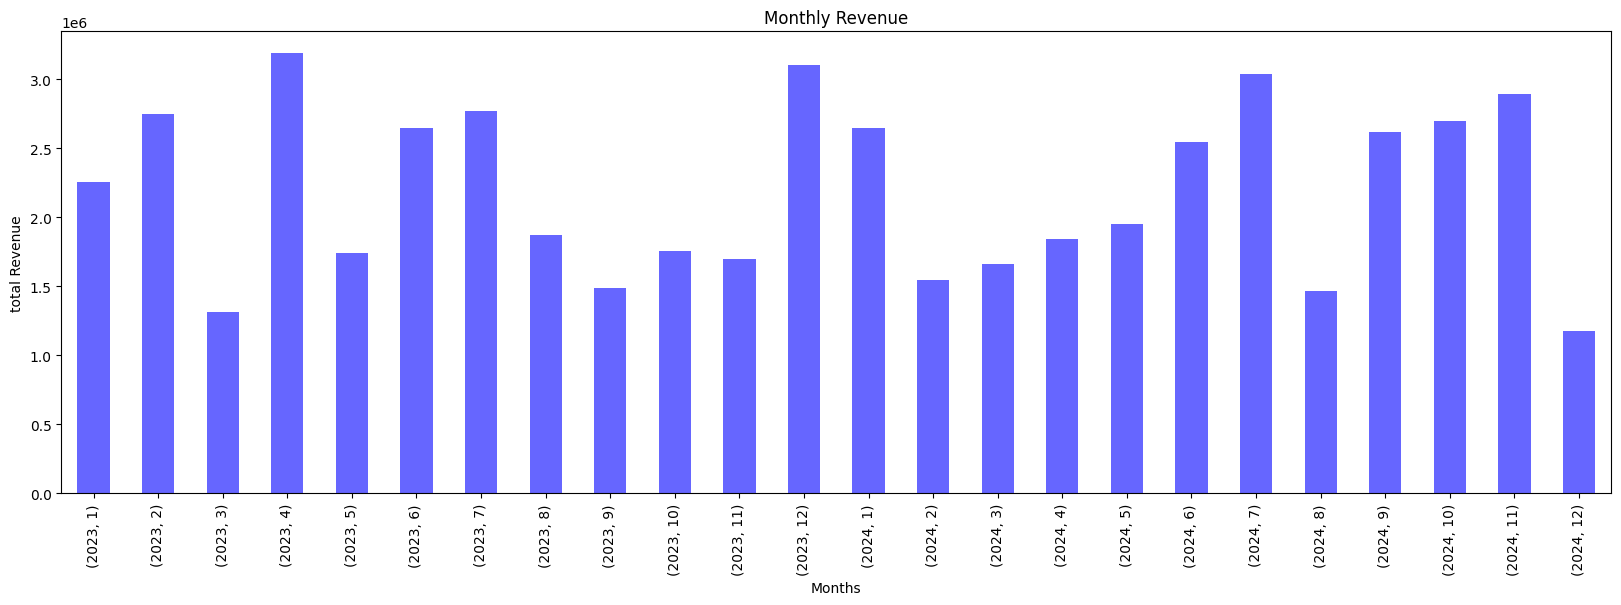

In [14]:
plt.figure(figsize=(20,6))
df.groupby(['order_year','order_month'])['total_amount'].sum().plot(kind = 'bar', color = 'blue', alpha = 0.6)
plt.xlabel('Months')
plt.ylabel('total Revenue')
plt.title('Monthly Revenue')
plt.show()

### Segment orders into low / medium / high value. What percentage falls into each bucket? 

In [27]:
def order_value_segment(row):
    if row['total_amount'] < 10000:
        return 'low'
    elif 10000 <= row['total_amount'] < 30000:
        return 'meduim'
    else:
        return 'high'
df['order_value_segment'] = df.apply(order_value_segment, axis = 1)

In [28]:
df.head()

,order_id,customer_id,product,category,quantity,unit_price,discount_percent,total_amount,region,payment_mode,order_date,order_datetime,order_year,order_month,order_value_segment
0,10001,2102,Smartwatch,Wearables,1,7538,20,6030.4,East,UPI,2024-05-14,2024-05-14,2024,5,low
1,10002,2435,Keyboard,Accessories,1,2443,10,2198.7,South,Cash on Delivery,2023-03-26,2023-03-26,2023,3,low
2,10003,2270,Headphones,Accessories,3,2914,5,8304.9,North,Net Banking,2024-01-21,2024-01-21,2024,1,low
3,10004,2106,Mouse,Accessories,3,1604,5,4571.4,South,Cash on Delivery,2023-02-22,2023-02-22,2023,2,low
4,10005,2071,Mouse,Accessories,4,2906,5,11042.8,South,Cash on Delivery,2023-04-25,2023-04-25,2023,4,meduim


In [29]:
print(df[df['order_value_segment'] == 'low'].shape[0])
print(df[df['order_value_segment'] == 'meduim'].shape[0])
print(df[df['order_value_segment'] == 'high'].shape[0])

277
226
497


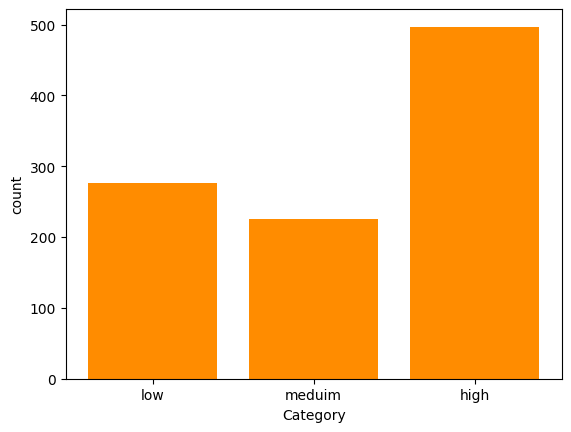

In [31]:
data = {
    'low':df[df['order_value_segment'] == 'low'].shape[0],
    'meduim':df[df['order_value_segment'] == 'meduim'].shape[0],
    'high':df[df['order_value_segment'] == 'high'].shape[0]
}
plt.bar(data.keys(), data.values(), color = 'darkorange')
plt.xlabel('Category')
plt.ylabel('count')
plt.show()

### Identify seasonal patterns in product sales (if any).
- monthly quantity sold of each product

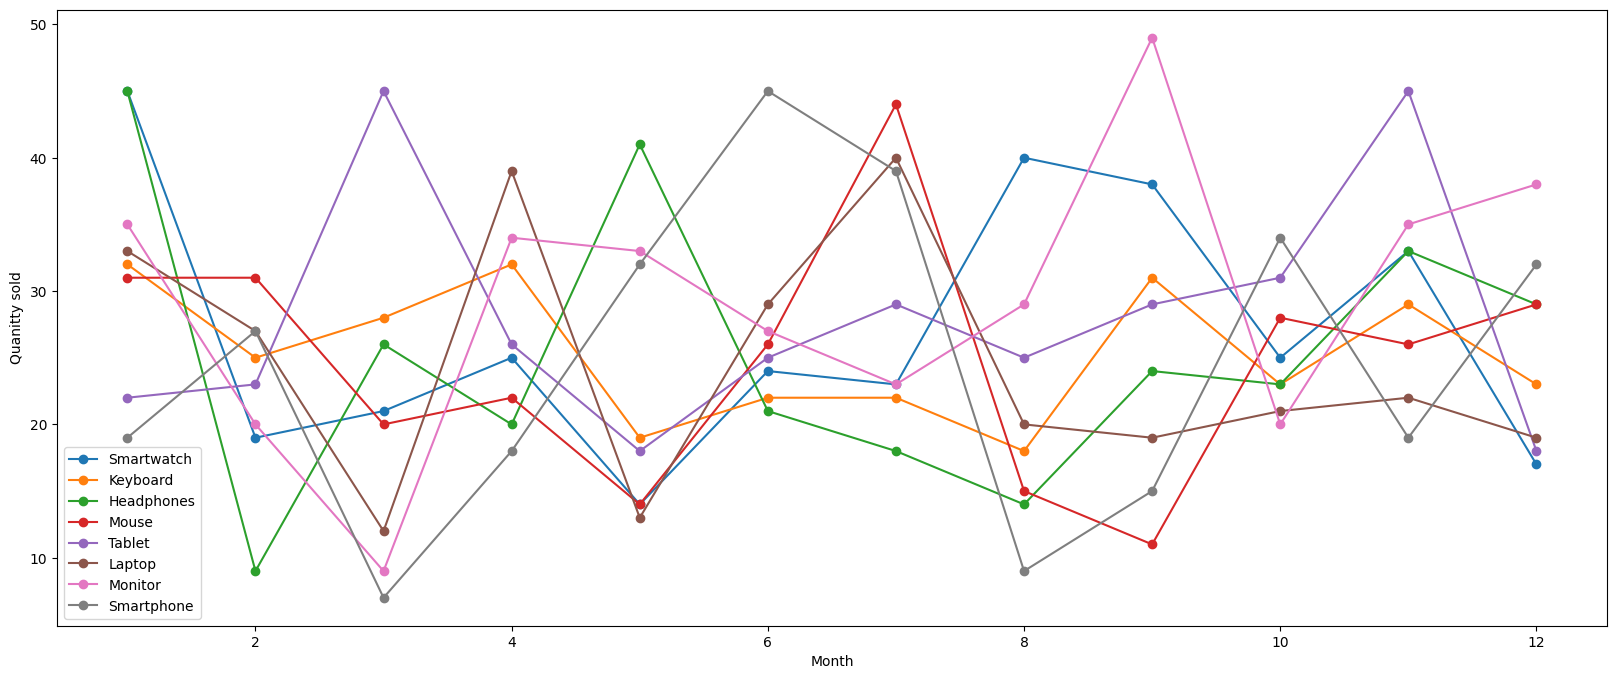

In [58]:
plt.figure(figsize = (20,8))

for product in df['product'].unique():
    monthly_sales = (
        df[df['product'] == product].groupby(['order_month'])['quantity'].sum()
    )
    plt.plot(monthly_sales.index, monthly_sales.values, label = product, marker = 'o')

plt.xlabel('Month')
plt.ylabel('Quanitty sold')
plt.legend()
plt.show()

### Which product shows the highest price variability?

In [59]:
df.groupby('product')['unit_price'].std().sort_values(ascending=False)

product
Smartphone    10599.801857
Laptop         8436.038483
Tablet         7512.939303
Monitor        5084.666757
Smartwatch     4539.286118
Headphones     1714.355155
Keyboard       1001.702153
Mouse           652.281600
Name: unit_price, dtype: float64

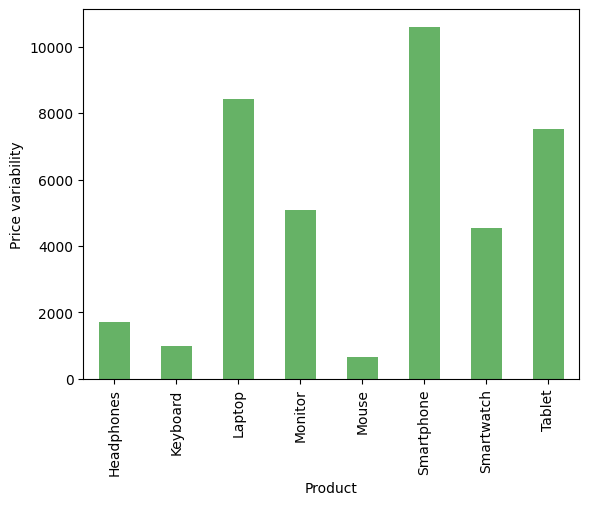

In [62]:
df.groupby('product')['unit_price'].std().plot(kind = 'bar', color = 'green', alpha = 0.6)
plt.xlabel('Product')
plt.ylabel('Price variability')
plt.show()

### Do customers who use UPI tend to place lower or higher value orders compared to cards?

In [63]:
df.groupby('payment_mode')['total_amount'].mean().sort_values(ascending = False)

payment_mode
UPI                 63276.489100
Cash on Delivery    52500.107711
Net Banking         49333.996154
Credit Card         48853.455952
Debit Card          48643.817760
Name: total_amount, dtype: float64

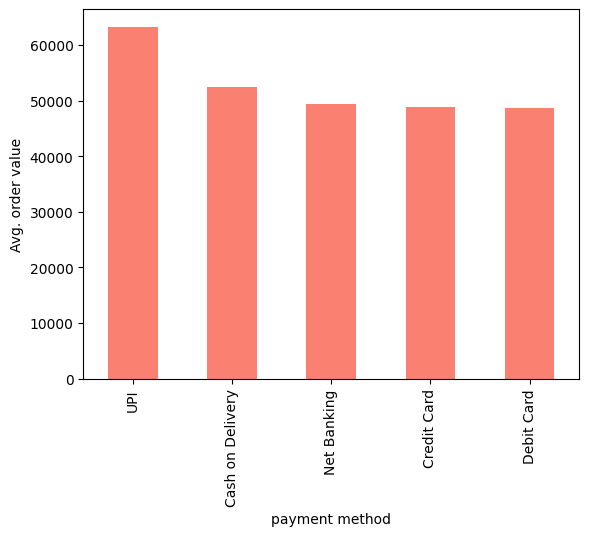

In [66]:
df.groupby('payment_mode')['total_amount'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'salmon')
plt.xlabel('payment method')
plt.ylabel('Avg. order value')
plt.show()
# UPI users places high valued orders compared to card users

### Analyze discount effectiveness: which discount level yields the highest total revenue?

In [68]:
# discount effectiveness
df.groupby('discount_percent')['total_amount'].sum().sort_values(ascending=False)

discount_percent
0     17018263.0
5     13068367.2
10    10826397.9
15     6679340.8
20     5092665.6
Name: total_amount, dtype: float64

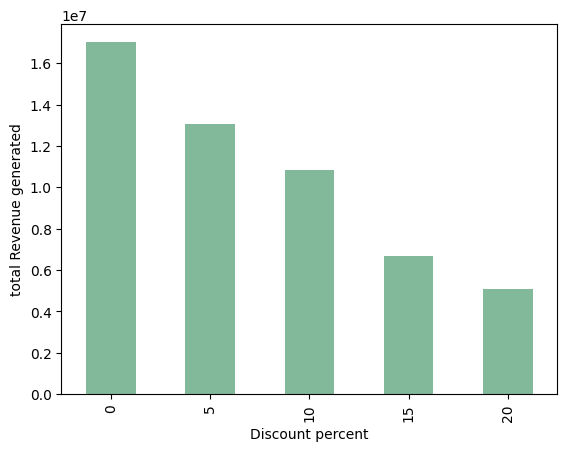

In [72]:
# plot of the same
df.groupby('discount_percent')['total_amount'].sum().sort_values(ascending=False).plot(kind = 'bar', color = 'seagreen', alpha = 0.6)
plt.xlabel('Discount percent')
plt.ylabel('total Revenue generated')
plt.show()

### Which region–product combination performs best in terms of revenue?

In [80]:
df.groupby(['region','product'])['total_amount'].sum().sort_values(ascending=False).head()

region   product
Central  Laptop     6066983.30
West     Laptop     4339689.35
North    Laptop     3536453.65
East     Laptop     3517359.00
North    Tablet     2581098.55
Name: total_amount, dtype: float64

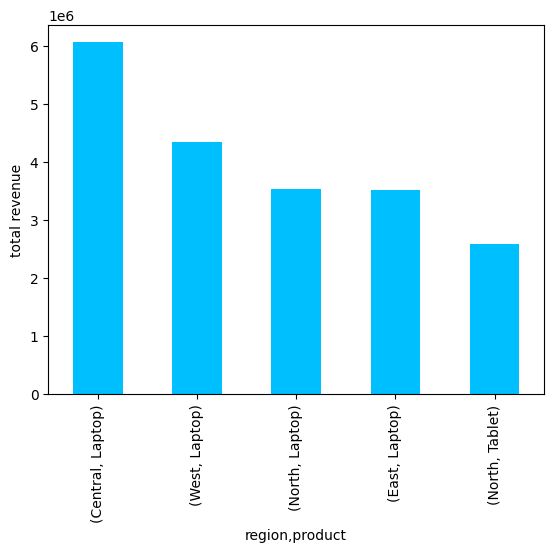

In [91]:
# top 5 plot
top5_combos = df.groupby(['region','product'])['total_amount'].sum().sort_values(ascending=False).head()
top5_combos.plot(kind = 'bar', color = 'deepskyblue')
plt.ylabel('total revenue')
plt.show()